In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score, f1_score, roc_auc_score, roc_curve, auc,  classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

task1

In [ ]:
data = pd.read_csv('dataset1.csv')
X = data[['x1', 'x2']].values
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.4f}")
    print("-" * 30)

Model: Logistic Regression
Accuracy: 0.9933
F1 Score: 0.9933
AUC-ROC: 1.0000
------------------------------
Model: SVM
Accuracy: 0.9967
F1 Score: 0.9967
AUC-ROC: 1.0000
------------------------------
Model: KNN
Accuracy: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000
------------------------------


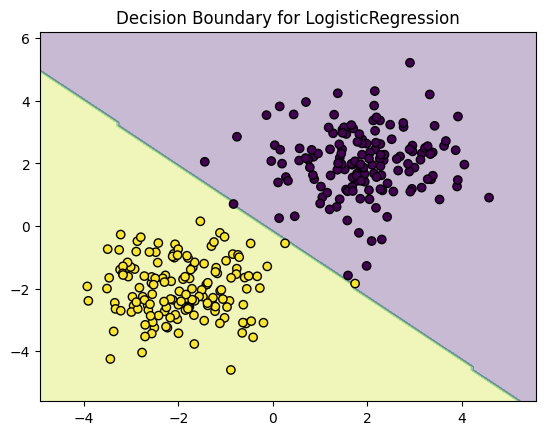

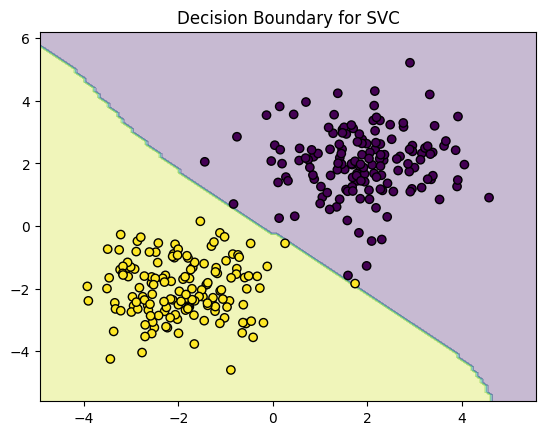

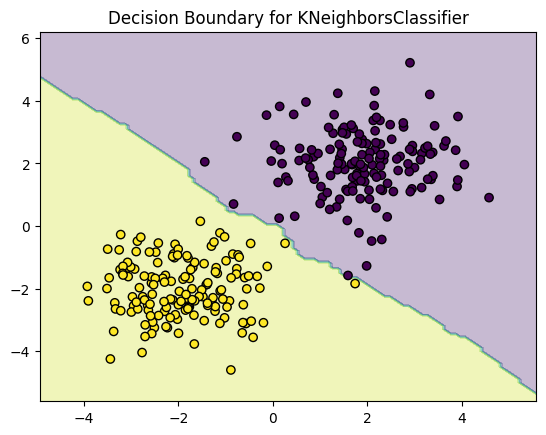

In [ ]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(f"Decision Boundary for {model.__class__.__name__}")
    plt.show()

for name, model in models.items():
    plt.figure()
    plot_decision_boundary(model, X_test, y_test)



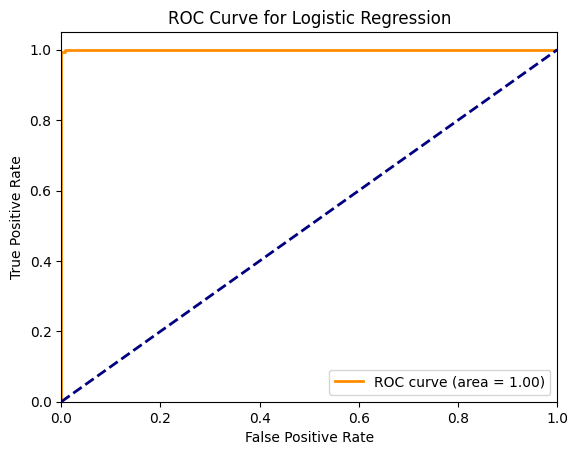

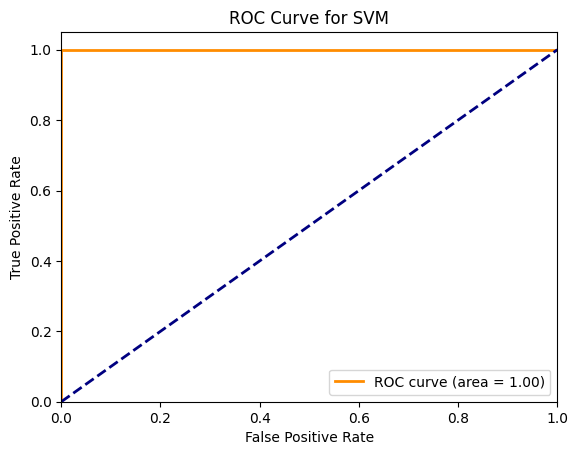

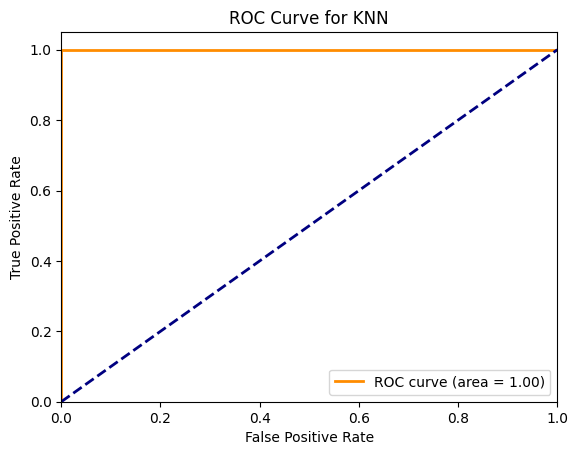

In [ ]:
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

Висновок:
За результатами найкраще для цього набору даних підходить модель KNN, так як вона видає 100% точність, інші модельки також мають досить високі результати.

task2

In [ ]:
data = pd.read_csv('dataset2.csv')
X = data[['x', 'y']].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}
# Навчання моделей та оцінка продуктивності
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    # Використовуємо "macro" для багатокласової оцінки
    print(f"F1 Score (macro): {f1_score(y_test, y_pred, average='macro'):.4f}")

    # Використовуємо multi_class='ovr' для багатокласової AUC-ROC
    print(f"AUC-ROC: {roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'):.4f}")
    print("-" * 30)


Model: Logistic Regression
Accuracy: 0.9407
F1 Score (macro): 0.9417
AUC-ROC: 0.9951
------------------------------
Model: SVM
Accuracy: 0.9333
F1 Score (macro): 0.9345
AUC-ROC: 0.9952
------------------------------
Model: KNN
Accuracy: 0.9333
F1 Score (macro): 0.9347
AUC-ROC: 0.9853
------------------------------


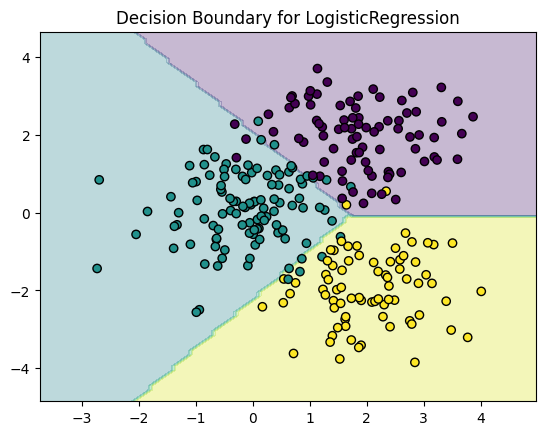

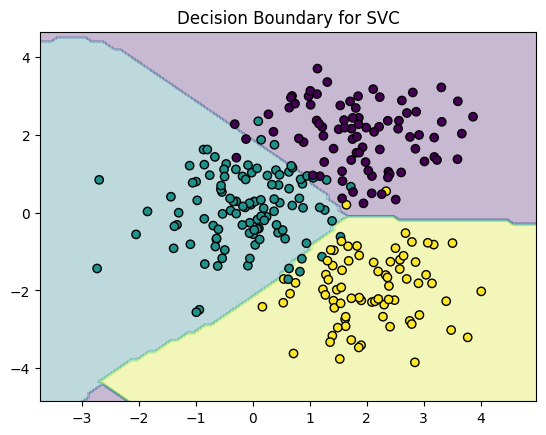

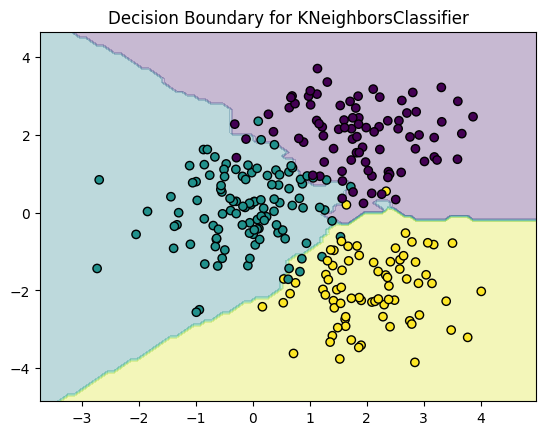

In [ ]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(f"Decision Boundary for {model.__class__.__name__}")
    plt.show()

for name, model in models.items():
    plt.figure()
    plot_decision_boundary(model, X_test, y_test)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


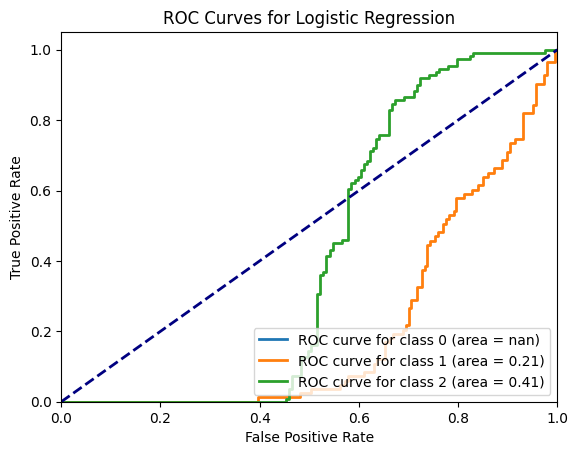

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


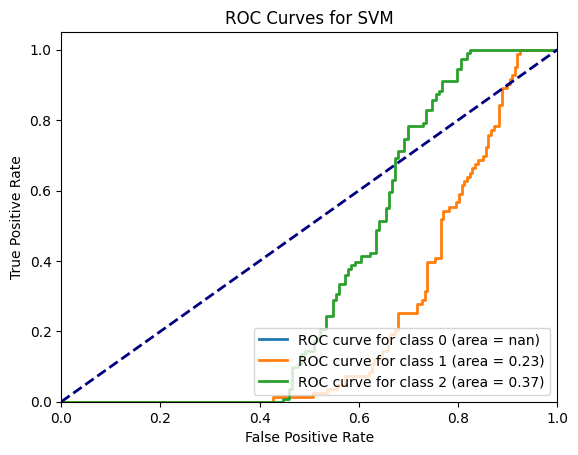

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


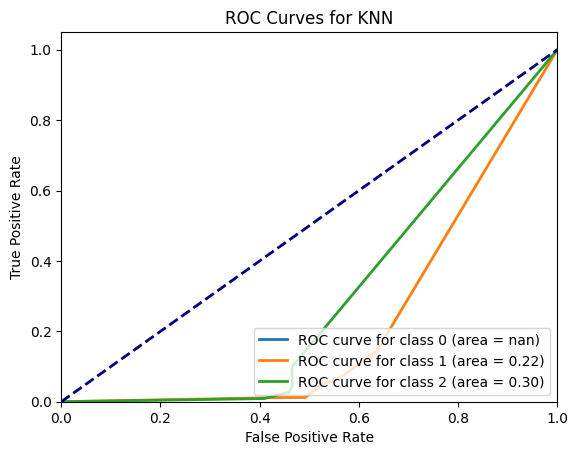

In [ ]:
# Візуалізація ROC кривої для кожної моделі
for name, model in models.items():
    model.fit(X_train, y_train)  # Переконуємося, що модель навчена
    y_prob = model.predict_proba(X_test)  # Отримуємо ймовірності для всіх класів

    plt.figure()

    # Обчислення ROC для кожного класу
    for i in range(y_prob.shape[1]):
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {i} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {name}')
    plt.legend(loc="lower right")
    plt.show()


Висновок: Logistic Regression показує найвищу точність та F1 Score серед усіх трьох моделей, що свідчить про те, що вона ефективно справляється з даними.
SVM демонструє подібні результати, з незначно вищим AUC-ROC, що вказує на те, що SVM здатна краще обробляти дані в умовах перекриття, оскільки вона оптимізує межу між класами, максимізуючи відстань до найближчих точок кожного класу.
KNN має найнижчі значення AUC-ROC,  може мати проблеми в умовах шуму або перекриття класів.

task3

Model: Logistic Regression
Accuracy: 0.5533
F1 Score: 0.5524
AUC-ROC: 0.5286
------------------------------


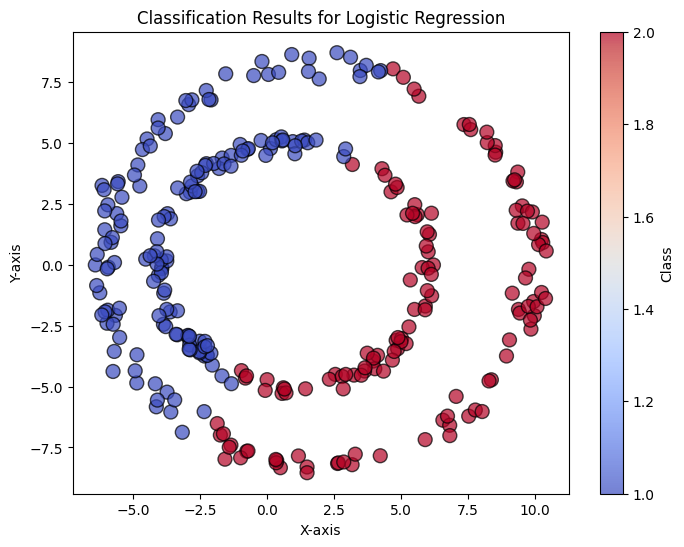

Model: SVM
Accuracy: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000
------------------------------


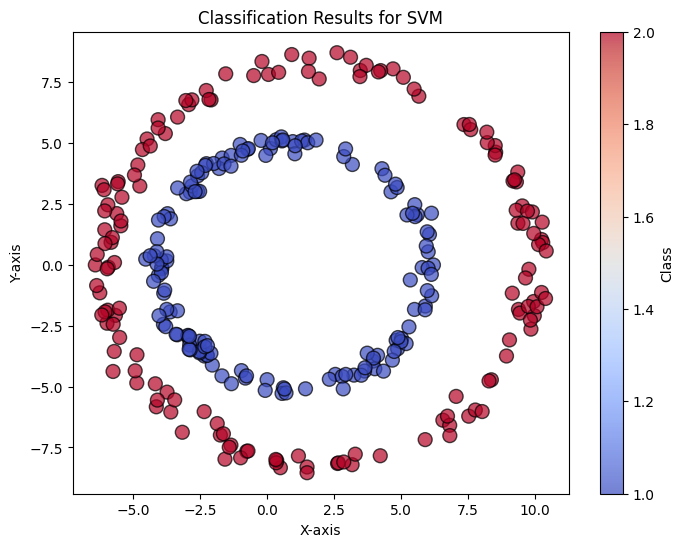

Model: Decision Tree
Accuracy: 0.9867
F1 Score: 0.9867
AUC-ROC: 0.9867
------------------------------


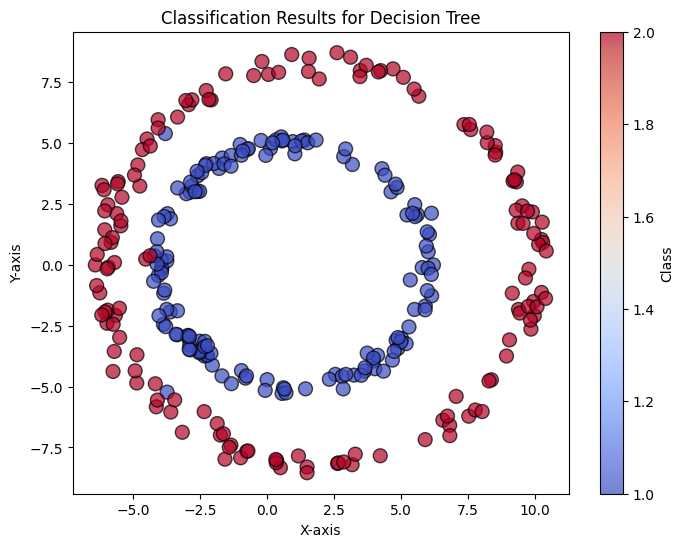

In [ ]:
data = pd.read_csv('dataset3.csv')

# Розділення даних на ознаки та ціль
X = data[['x', 'y']]
y = data['class']

# Розділення на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Визначення моделей
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier()
}

# Навчання моделей та оцінка продуктивності
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Виведення результатів для кожної моделі
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_score:.4f}")
    print("-" * 30)

    # Візуалізація результатів класифікації
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test['x'], X_test['y'], c=y_pred, cmap='coolwarm', edgecolors='k', s=100, alpha=0.7)
    plt.title(f"Classification Results for {name}")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.colorbar(label='Class')
    plt.show()

Висновок: SVM виявилася найкращою моделлю, досягнувши 100% точності. Це свідчить про те, що SVM може ефективно обробляти дані з нелінійними межами розділення між класами.
Нелінійність у даних суттєво вплинула на процес класифікації. Логістична регресія, яка працює за умовами лінійної роздільності, показала найгірші результати, оскільки не змогла виявити складні залежності між ознаками.
На відміну від цього, SVM і Decision Tree адаптувалися до складної топології даних. SVM, використовуючи ядра, може знаходити нелінійні межі між класами, в той час як дерево рішень здатне адаптуватися до різноманітних форм даних, що дало їй високі оцінки.

task 4

Model: SVM
Accuracy: 0.5833
F1 Score: 0.5455
AUC-ROC: 0.6501
------------------------------
Model: Decision Tree
Accuracy: 0.9833
F1 Score: 0.9833
AUC-ROC: 0.9833
------------------------------
Model: MLP
Accuracy: 0.5600
F1 Score: 0.5286
AUC-ROC: 0.6778
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


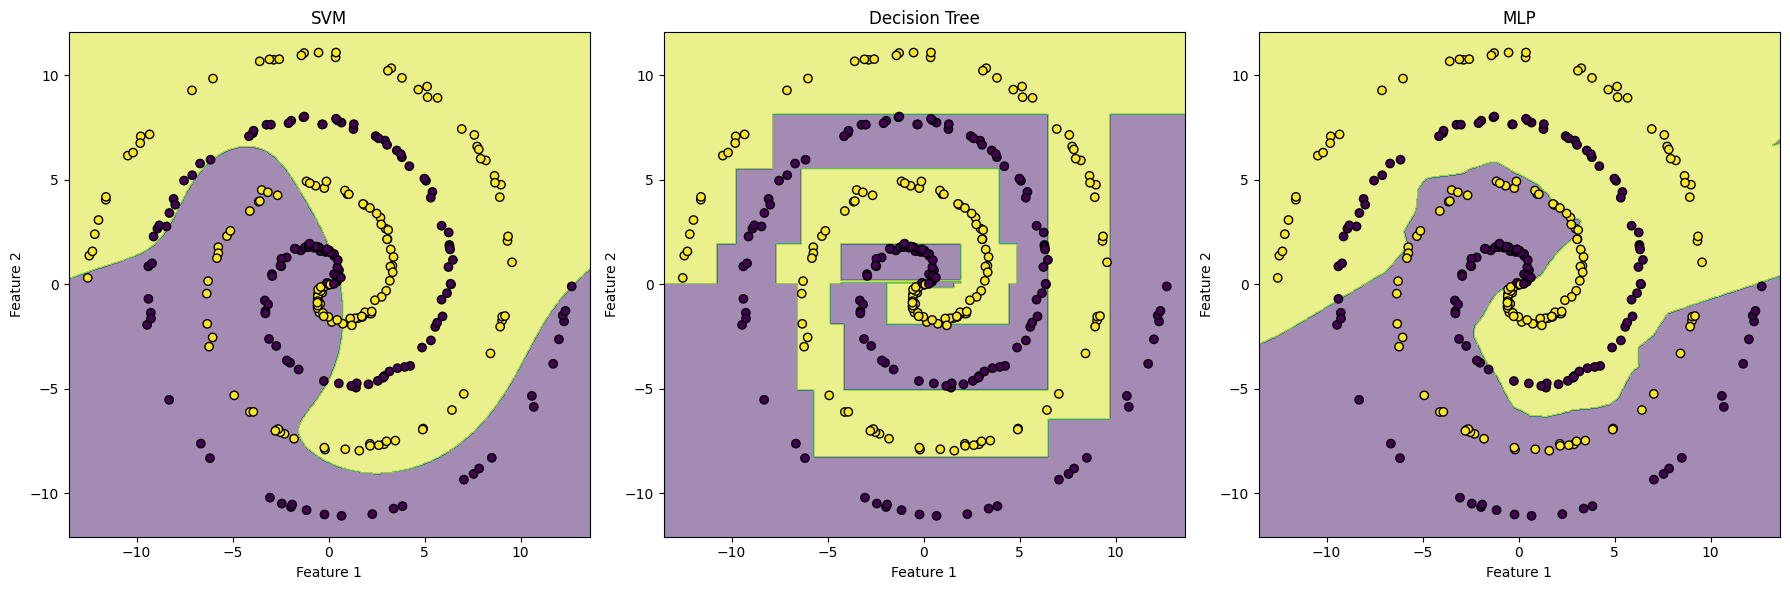

In [5]:
data = pd.read_csv('dataset4.csv')

# Розділення даних на ознаки та ціль
X = data[['x', 'y']]
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Словник моделей
models = {
    'SVM': SVC(kernel='rbf', probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'MLP': MLPClassifier(max_iter=1000)
}

# Оцінка моделей
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Доступ до ймовірностей через .values, якщо X_test - DataFrame
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'AUC-ROC': auc,
    }

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print("-" * 30)

# Візуалізація даних та меж класифікації
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    # Зменшено значення кроку до 0.05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Показуємо межі класифікації для кожної моделі
plt.figure(figsize=(18, 6))

for i, (name, model) in enumerate(models.items(), start=1):
    plt.subplot(1, 3, i)
    plot_decision_boundary(model, X_test, y_test, name)

plt.tight_layout()
plt.show()

Висновок: Decision Tree є найкращою моделлю. Вона показала високу точність та F1 Scorе, що свідчить про її здатність добре справлятися з класифікацією класів, навіть коли дані формують складну, нелінійну структуру, як у випадку з подвійною спіраллю. Для моделей, які працюють на основі лінійних припущень (як SVM з лінійним ядром або MLP без належної конфігурації), нелінійні межі між класами можуть призвести до низької точності. У випадку Decision Tree, її гнучкість у моделюванні складних, нерівномірних форм дозволяє їй ефективно адаптуватися до даних з нелінійними зв'язками.